# Pobranie danych

In [ ]:
import datetime
!pip install wget
import wget
import zipfile

# url = 'https://files.grouplens.org/datasets/movielens/ml-latest.zip'
#
# wget.download(url)
# with zipfile.ZipFile('ml-latest.zip', 'r') as zip_ref:
#     zip_ref.extractall('./')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Wstępna analiza 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.rcParams["figure.figsize"] = (20,5)


In [ ]:
dir = './ml-latest/'

movies = pd.read_csv(dir + 'movies.csv')
ratings = pd.read_csv(dir + 'ratings.csv')
tags = pd.read_csv(dir + 'tags.csv')

Zbiór zawiera 27753444 ocen i 1108997 przypisań tagów do 58098 filmów. Dane te zostały utworzone przez 283228 użytkowników między 09 stycznia 1995 r., a 26 września 2018 r. Zbiór danych został wygenerowany 26 września 2018 roku i pochodzi z serwisu, którego użytkownicy oceniali filmy w celu pobrania rekomendacji.

Pliki, które będą najbardziej przydatne w naszym problemie:
* ratings.csv - zawiera userId,movieId,rating,timestamp czyli oceny nadane przez użytkowników dla poszczególnych filmów w skali 1-5
* tags.csv - przypisania tagów do filmów
* movies.csv - informacje o filmach, przypisanie gatunków do filmu
* links.csv - odnośniki do filmów w popularnych serwisach
* pliki genome - współczynniki w jakim stopniu dany film odwzwierciedla dany gatunek/tag

Do naszego problemu najbardziej przyda się ratings.csv, movies.csv i tags.csv.

## Co zawierają zbiory?

### Tags.csv

In [ ]:
tags.head(10)

,userId,movieId,tag,timestamp
0,14,110,epic,1443148538
1,14,110,Medieval,1443148532
2,14,260,sci-fi,1442169410
3,14,260,space action,1442169421
4,14,318,imdb top 250,1442615195
5,14,318,justice,1442615192
6,14,480,Dinosaurs,1443148563
7,14,593,psychothriller,1444014286
8,14,1682,philosophy,1442615158
9,14,1682,surveillance,1442615167


#### Rozkład tagów


In [ ]:
len(tags.index)

1108997

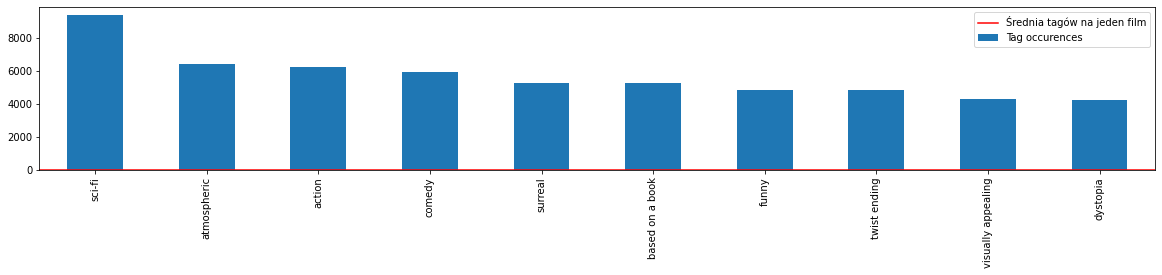

In [ ]:
ax = tags['tag'].value_counts().nlargest(10).plot(kind='bar', label="Tag occurences")

avg = tags['tag'].value_counts().sum()/len(tags['tag'].value_counts())

ax.axhline(avg, color='red', label="Średnia tagów na jeden film")
ax.legend(loc='upper right')

### Movies.csv

In [ ]:
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


#### Rozkład gatunków

In [ ]:
# W celach wizulizacji wybierzemy gatunek z indeksu 0 jako gatunek główny

movies['main_genre'] = movies['genres'].apply(lambda x: x.split('|')[0] if len(x.split('|')) > 0 else None)

<AxesSubplot:>

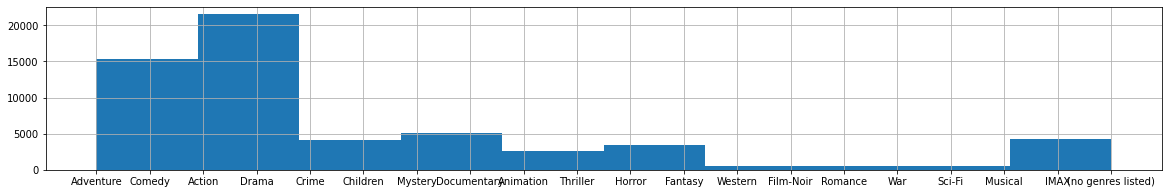

In [ ]:
movies['main_genre'].hist()

### Ratings.csv

In [ ]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
5,1,1590,2.5,1256677236
6,1,1591,1.5,1256677475
7,1,2134,4.5,1256677464
8,1,2478,4.0,1256677239
9,1,2840,3.0,1256677500


#### Rozkład ocen

<AxesSubplot:>

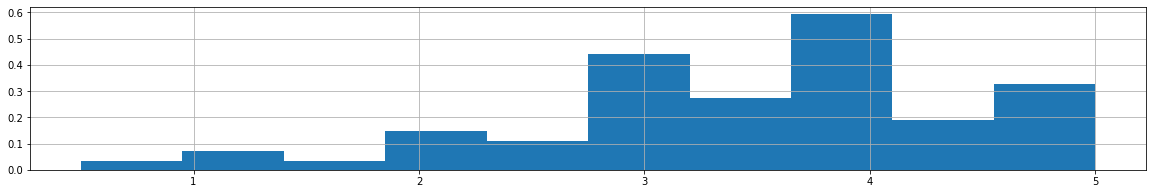

In [ ]:
ratings["rating"].hist(density=True)

#### Współczynnik skośności i średnia ocena

In [ ]:
ratings["rating"].skew(), ratings["rating"].mean()


(-0.6976173841363082, 3.5304452124932677)

#### Ilość ocen na film

Text(0, 0.5, 'Ilość ocen')

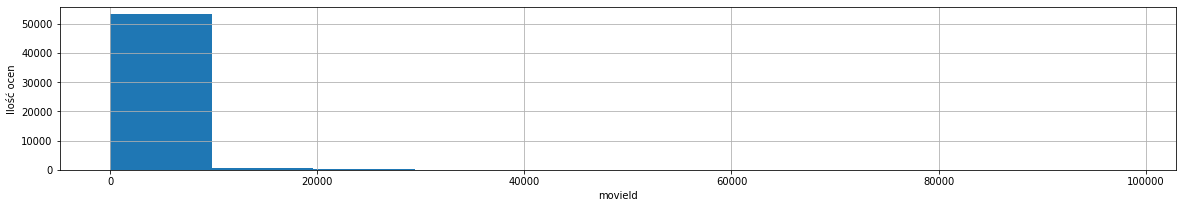

In [ ]:
ax = ratings[['movieId']].value_counts().hist()
ax.set_xlabel('movieId')
ax.set_ylabel('Ilość ocen')

Ocena per fiilm

In [8]:
from models.Movie import Movie
from sqlalchemy import select
from sqlalchemy.orm import Session
from db.Connection import Connection

ratings = None

connection = Connection()
with Session(connection.engine) as session:
    movie = session.query(Movie).first()
    print(movie.name)
    ratings = movie.ratings


Toy Story (1995)
863236098
1066392762
939627565
831048444
1207308748
862698376
1458441925
1354048656
1123515221
1002295905
1039325669
829056646
1254180477
1343771751
1264545088
944007642
1062820087
1201380957
850202339
1437229278
956778765
1120992570
1158142404
888472241
1202817080
1005401545
1464113599
1239578656
828780185
979690865
846189781
1343802031
1091426444
1468692659
1216403145
1508270287
858248319
940850389
1432016951
1486473109
869146583
1493065022
1121712151
974771592
1196803167
949345459
1316450467
1111451080
1528800817
857672743
1195193145
861220603
1010289127
1450662859
1412272830
884974620
1345160421
1436285106
848996941
975860648
1005579339
832163136
860873870
1114204253
1462698779
1506731624
865329848
867003985
1504542438
977434199
1283039361
911934354
998234872
1226895632
857932676
1434730623
1220152771
856527749
1484608191
1173206549
1534038977
1488072419
864156699
1465126410
1248738894
1113198235
1467192366
1337180491
1264227993
1157348971
831659233
846899026
96506

NameError: name 'plt' is not defined

<Axes: title={'center': 'Average rating per year for Toy Story (1995)'}, xlabel='year'>

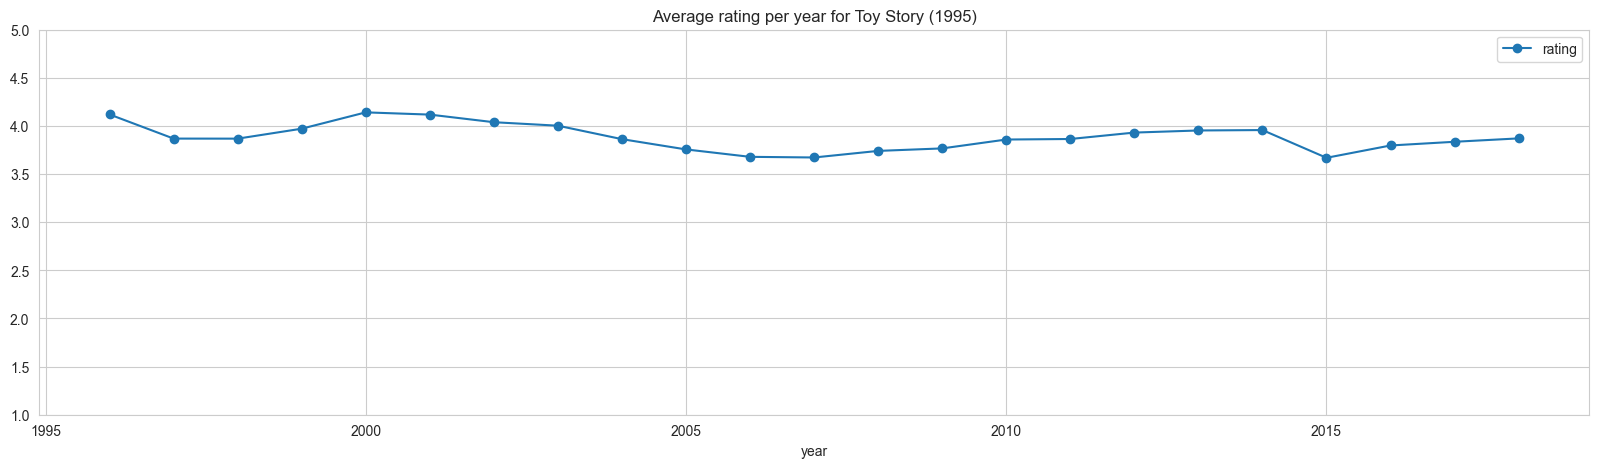

In [41]:
res = map(
        lambda r: (datetime.datetime.fromtimestamp(int(r.timestamp)).year, r.rating),
        ratings
    )

ratings_per_movie_df = pd.DataFrame(res)
ratings_per_movie_df.columns = ['year', 'rating']
ratings_per_movie_df['year'] = ratings_per_movie_df['year'].astype(int)
ratings_per_movie_df.groupby(['year']).mean().plot(title='Average rating per year for %s' % movie.name, marker='o', yticks=[i for i in np.arange(1.0, 5.5, 0.5)])



#### Rozkład ocen wg. gatunku

In [ ]:
boxplot_df = ratings.merge(movies[['movieId', 'main_genre']],  how='left', on='movieId')

Text(0, 0.5, 'Rating')

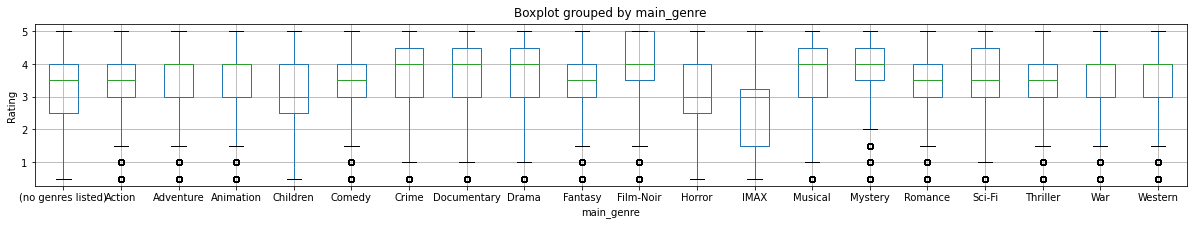

In [ ]:
ax = boxplot_df.boxplot(column=['rating'], by='main_genre')
ax.set_title("")
ax.set_ylabel("Rating")

#### Średnia ilość ocen na film

In [ ]:
ratings['movieId'].value_counts().mean()

515.0113010076268

## Podsumowanie

W zbiorze `movies` kolumna `genres` to lista gatunków i nie jest znormalizowana - w kolumnie przechowywana jest lista. Nie ma powodu normalizować tej kolumny ponieważ:
  * nie ma wiarygodnej metody na wybranie z listy gatunku wodzącego (najbardziej pasującego) (zrobić to losowo czy posortowac alfabetycznie?)
  * na etapie przygotowywania danych gatunki i tak zostaną zakodowane w przestrzeni jako wektor

Na cele wizulizacji po prostu obieramy gatunek z indeksu 0 jako gatunek główny.

Średnio każdy film ma przypisane 5 tagów, podczas gdy cały zbiór przypisań ma 1108997 elementów na 58098. Z wykresu można wywniskować, że w tym zbiorze jest dużo outlierów - nie jest to zaskoczenie ponieważ tagi to są frazy definiowane przez użytkowników i nieustandaryzowane w żaden sposób - zatem każdy mógł przypisać do filmu co chciał.

Wykres dystrybucji ocen przypomina rozkład normalny, z tym, że jest to rozkład lewostronnie skośny. Współczynnik skośności wynosi -0.69.

## Proponowane modele

1. Content-based filtering: Ta metoda rekomenduje pozycje na podstawie podobieństwa między cechami pozycji a preferencjami użytkownika. Filtrowanie oparte na treści może być stosowane, gdy istnieje wystarczająca ilość danych o cechach przedmiotu i preferencjach użytkownika.
  * możliwe implementacje:
    * zakodowanie gatunków, tagów i innych cech, które uznamy za stosowne, do wektora, po czym dobranie rekomdendacji na podstawie dobranej metryki, np. Cosine similarity
    * j/w tylko użycie opisów dot. filmu z bazy danych np. IMDB
  * użytkownik wybiera np. 5 filmów, które mu się podobają i otrzymuje rekomendacje
  * bez użycia sieci neuronowych
2. Collaborative filtering: Metoda ta rekomenduje pozycje na podstawie podobieństwa pomiędzy przeszłymi zachowaniami i preferencjami użytkowników. 
  * czyli rekomendacje są opracowywane na podstawie co lubią oglądać użytkownicy z profilem podobnym do nas
  * możliwe implementacje:
    * matrix factorization (https://surprise.readthedocs.io/en/stable/matrix_factorization.html)
    * 𝑘-nearest neighbor methods
    * generalnie trudniejsze i trzeba więcej poczytac
3. Metody hybrydowe łączące 1 i 2

### Todo 
  * przed spotkaniem:
    * dokonać jakiejs wizulizacji w przestrzeni
      * zredukować to przez PCA/TSNE i narysować wykres 2d/3d
  * ogółem:

    * połączyć datasety w jeden (meta dane z resztą itd)
    * wybrać metody i metryki do liczenia podobienstwa miedzy filmami

In [ ]:
ratings['movieId']

0             307
1             481
2            1091
3            1257
4            1449
            ...  
27753439     8542
27753440     8712
27753441    34405
27753442    44761
27753443    54286
Name: movieId, Length: 27753444, dtype: int64

In [ ]:
tags.groupby(by='movieId')['tag'].apply(list)

movieId
1         [animated, buddy movie, Cartoon, cgi, comedy, ...
2         [fantasy, adapted from:book, animals, bad cgi,...
3         [moldy, old, Ann Margaret, Burgess Meredith, D...
4         [characters, girl movie, characters, chick fli...
5         [steve martin, steve martin, pregnancy, remake...
                                ...                        
193761    [concert, hostage, kidnapping, opera singer, r...
193811                          [doppelganger, Julie Delpy]
193837           [aliens, anime, cat, space marines, virus]
193864    [Alfredo Landa, anticonception, comic, family,...
193868    [black and white, comedy, friendship, fun, mar...
Name: tag, Length: 45981, dtype: object

In [ ]:
grouped = tags.groupby(by='movieId')['tag'].apply(list).reset_index(name='new')

grouped

,movieId,new
0,1,"[animated, buddy movie, Cartoon, cgi, comedy, ..."
1,2,"[fantasy, adapted from:book, animals, bad cgi,..."
2,3,"[moldy, old, Ann Margaret, Burgess Meredith, D..."
3,4,"[characters, girl movie, characters, chick fli..."
4,5,"[steve martin, steve martin, pregnancy, remake..."
...,...,...
45976,193761,"[concert, hostage, kidnapping, opera singer, r..."
45977,193811,"[doppelganger, Julie Delpy]"
45978,193837,"[aliens, anime, cat, space marines, virus]"
45979,193864,"[Alfredo Landa, anticonception, comic, family,..."


In [ ]:
movies_tag_merged = movies.merge(grouped, how='left', on='movieId')

movies

,movieId,title,genres,main_genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure
1,2,Jumanji (1995),Adventure|Children|Fantasy,Adventure
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Comedy
4,5,Father of the Bride Part II (1995),Comedy,Comedy
...,...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed),(no genres listed)
58094,193878,Les tribulations d'une caissière (2011),Comedy,Comedy
58095,193880,Her Name Was Mumu (2016),Drama,Drama
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,Adventure


In [ ]:
def split_genres(text):
  if text == '(no genres listed)':
    return []

  return text.split("|")

movies_tag_merged['genres'] = movies_tag_merged['genres'].apply(split_genres)

movies_tag_merged['new'] = movies_tag_merged['new'].apply(lambda d: d if isinstance(d, list) else [])

In [ ]:
movies_tag_merged['combined'] = movies_tag_merged['genres'] + movies_tag_merged['new']

In [ ]:
movies_tag_merged['combined'] = movies_tag_merged['combined'].astype('str')

In [ ]:
def clean(text):
  new_text = ''
  for x in text:
    if x != '[' and x != ']' and x != ',' and x != "'":
      new_text += x

  return new_text 
movies_tag_merged['combined'] = movies_tag_merged['combined'].apply(clean)

In [ ]:
movies_tag_merged['combined'] 

0        Adventure Animation Children Comedy Fantasy an...
1        Adventure Children Fantasy fantasy adapted fro...
2        Comedy Romance moldy old Ann Margaret Burgess ...
3        Comedy Drama Romance characters girl movie cha...
4        Comedy steve martin steve martin pregnancy rem...
                               ...                        
58093                                                     
58094                                               Comedy
58095                                                Drama
58096                        Adventure Drama Horror Sci-Fi
58097                                   Action Crime Drama
Name: combined, Length: 58098, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(analyzer='word', stop_words='english', min_df = 1, ngram_range = (1, 2))

X = vect.fit_transform(movies_tag_merged['combined'])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(n_components=2)

X_red = pca.fit_transform(X)

In [ ]:
genres = movies_tag_merged['main_genre'].unique().tolist()

In [ ]:
genres

['Adventure',
 'Comedy',
 'Action',
 'Drama',
 'Crime',
 'Children',
 'Mystery',
 'Documentary',
 'Animation',
 'Thriller',
 'Horror',
 'Fantasy',
 'Western',
 'Film-Noir',
 'Romance',
 'War',
 'Sci-Fi',
 'Musical',
 'IMAX',
 '(no genres listed)']

In [ ]:
movies_tag_merged['x'] = X_red[:,0]
movies_tag_merged['y'] = X_red[:,1]

In [ ]:
scatter_df = movies_tag_merged[movies_tag_merged['main_genre'] != None]

## Wizualizacja zbioru w przestrzeni

Łączymy listę gatunków i przypisanych tagów dla danego filmu w jeden tekst. Następnie dokonujemy wektoryzacji TF-IDF.

Po redukcji wymiarów tworzony jest poniższy wykres. Obrana metryka jest dyskusyjna i nie ma jednego poprawnego sposobu, ale na poniższym wykresie można zauważyć, że łatwo można wyróżnić dwie grupy filmów - family-friendly (children, comedy) oraz kino dla starszych (action, drama, horror).


In [ ]:
import plotly.express as px

px.scatter(scatter_df[:10000], x='x', y='y', color='main_genre', opacity=.5)